In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split 

**Importing the dataset**

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [7]:
df = df.drop_duplicates()

In [8]:
df.shape

(400, 5)

**Splitting the dataset into the Training set and Test set**

In [11]:
X = df[['Age', 'EstimatedSalary']].values # fts
y = df['Purchased'].values # target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=7)

**Feature Scaling**

In [12]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

**Fitting Decision Tree Classification to the Training set**

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train) 

DecisionTreeClassifier()

**Predicting the Test set results**

In [15]:
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

**Making the Confusion Matrix**

In [16]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve

acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))


Test set accuracy: 0.84
Test set auc: 0.79


**Visualising the Training set results**

C:\Users\Snega\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


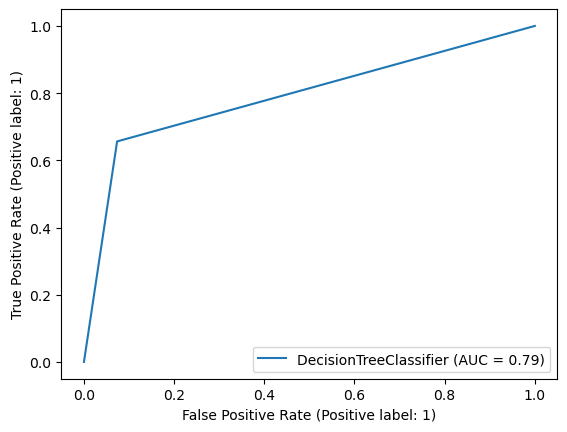

In [17]:
plot_roc_curve(dt, X_test, y_test)

**Visualising the Test set results**

In [24]:
from sklearn.model_selection import cross_val_score 
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
    dt = DecisionTreeClassifier(max_depth=depth) 
    dt.fit(X_train, y_train) 
    trainAccuracy = accuracy_score(y_train, dt.predict(X_train)) 
    dt = DecisionTreeClassifier(max_depth=depth) 
    valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) 
    print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.8333333333333334  Cross val score :  0.8266666666666668
Depth  :  2  Training Accuracy :  0.9166666666666666  Cross val score :  0.9133333333333334
Depth  :  3  Training Accuracy :  0.9166666666666666  Cross val score :  0.9066666666666666
Depth  :  4  Training Accuracy :  0.9366666666666666  Cross val score :  0.8800000000000001
Depth  :  5  Training Accuracy :  0.9433333333333334  Cross val score :  0.8666666666666668
Depth  :  6  Training Accuracy :  0.9666666666666667  Cross val score :  0.8700000000000001
Depth  :  7  Training Accuracy :  0.9733333333333334  Cross val score :  0.8600000000000001
Depth  :  8  Training Accuracy :  0.9866666666666667  Cross val score :  0.8666666666666668
Depth  :  9  Training Accuracy :  0.99  Cross val score :  0.8500000000000002
Depth  :  10  Training Accuracy :  0.9966666666666667  Cross val score :  0.8500000000000002
Depth  :  20  Training Accuracy :  1.0  Cross val score :  0.8466666666666669


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from matplotlib import pyplot
dt = DecisionTreeClassifier(max_depth = 2)
dt.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'X[0] <= 44.5\ngini = 0.455\nsamples = 320\nvalue = [208, 112]'),
 Text(0.25, 0.5, 'X[1] <= 90500.0\ngini = 0.273\nsamples = 233\nvalue = [195, 38]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.06\nsamples = 194\nvalue = [188, 6]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.295\nsamples = 39\nvalue = [7, 32]'),
 Text(0.75, 0.5, 'X[0] <= 46.5\ngini = 0.254\nsamples = 87\nvalue = [13, 74]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.457\nsamples = 17\nvalue = [6, 11]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.18\nsamples = 70\nvalue = [7, 63]')]

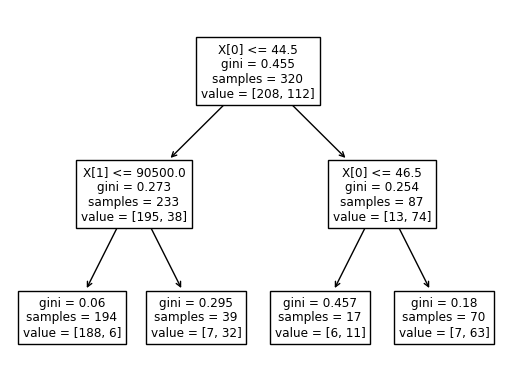

In [31]:
from sklearn import tree
tree.plot_tree(dt)